In [1]:
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
import copy
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
rf = RandomForestClassifier(n_estimators=50, random_state=100)

In [2]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):

    # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r'\r|\n', ' ', text.lower())

    # Remove links and mentions
    # (?:expression) means the expression is not captured
    # either an @, https://, or http:// followed by
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)

    # Remove punctuation (MUGA)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words (MUGA)
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="n") for word in lemmatized_words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="a") for word in lemmatized_words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="r") for word in lemmatized_words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="s") for word in lemmatized_words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

In [3]:
def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [4]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [5]:
df['text_clean'] = [clean_tweet(tweet) for tweet in df['tweet_text']]

In [6]:
df

,tweet_text,cyberbullying_type,text_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thank head concern another angry dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expect anything depend anything y...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner call cou...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch get bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt nigger fuck unfollow fuck dumb nigger


In [21]:
df['text_clean'][(df['cyberbullying_type'] == 3) & (df['text_clean'].str.contains('can'))]

7972     can not call bitch bitch female dog female dog...
7974     rt swear sexist honestly can not stand woman c...
7975     morrison believe labor candidate history socia...
7992     rt sexist can not fall asleep female drive unl...
8004     hell recur weirdness swear sexist female chipo...
                               ...                        
15854    wait go seth mcfarland family guy american dad...
15883    narape ata si duterte noon perhaps enjoy socie...
15892    people yell stan loona rape victim shoot victi...
15907    miseducation american boy boy crack rape joke ...
15917    rt twitterfeminism can not convince three teen...
Name: text_clean, Length: 571, dtype: object

In [7]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

In [13]:
df['cyberbullying_type'] = df['cyberbullying_type'].replace({'religion':0,
                                                             'age':1,
                                                             'ethnicity':2,
                                                             'gender':3,
                                                             'not_cyberbullying':4,
                                                             'other_cyberbullying':5})

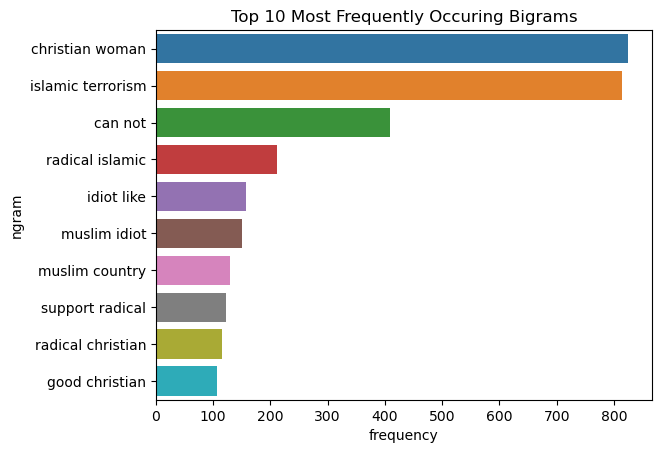

In [23]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df[df['cyberbullying_type'] == 0]['text_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

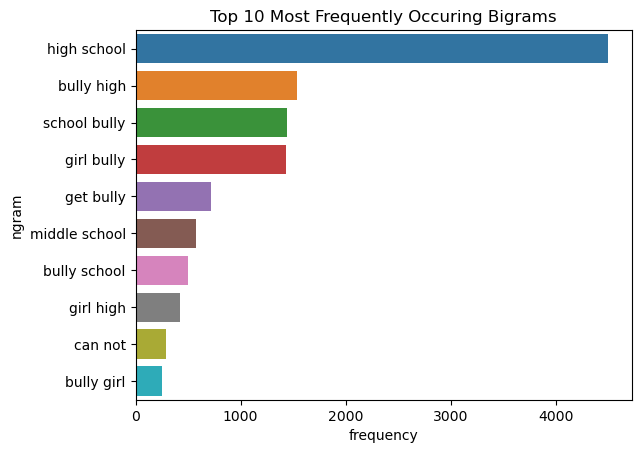

In [14]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df[df['cyberbullying_type'] == 1]['text_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

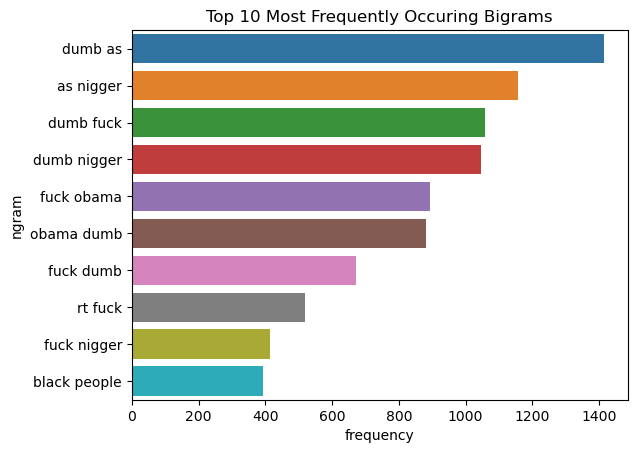

In [15]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df[df['cyberbullying_type'] == 2]['text_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

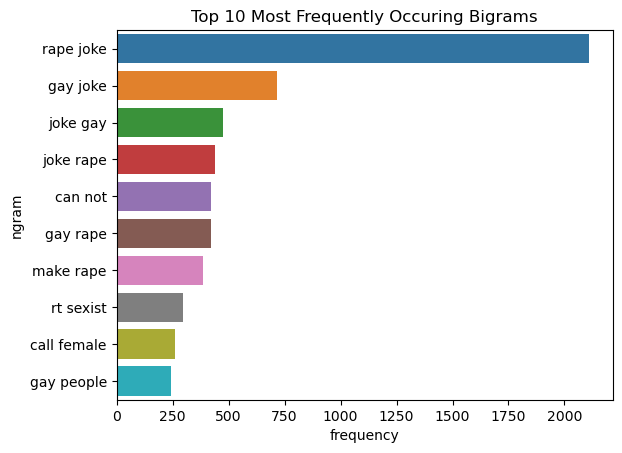

In [16]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df[df['cyberbullying_type'] == 3]['text_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

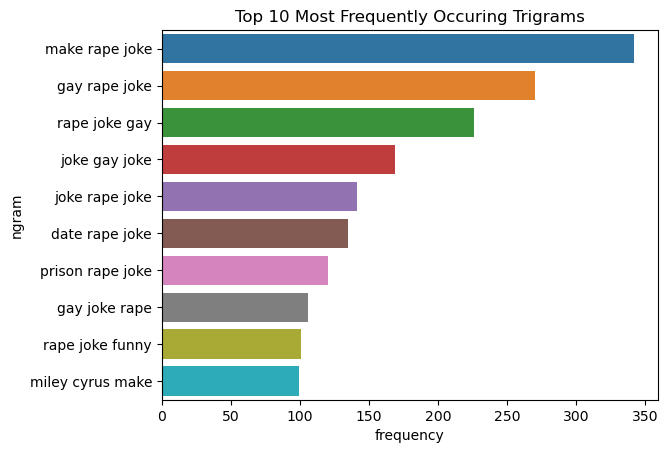

In [18]:
cv = CountVectorizer(ngram_range=(3,3))
bigrams = cv.fit_transform(df[df['cyberbullying_type'] == 3]['text_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

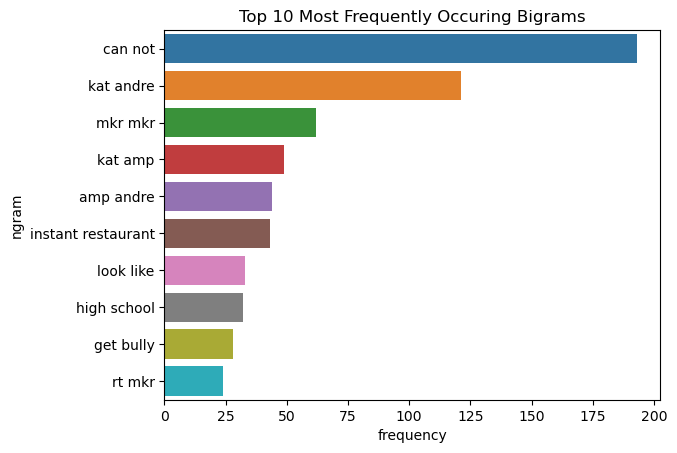

In [22]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df[df['cyberbullying_type'] == 4]['text_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
{'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4, 'other_cyberbullying':5}